In [26]:
import pandas as pd
import random
import requests
import io
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [27]:
 # Downloading the csv file from GitHub 

url = "https://raw.githubusercontent.com/brown016340/Project-1/development/Resources/2018_Squirrel_Data.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

squirrel_df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [28]:
# Specify the number of samples you want for each color.
samples_per_color = 75

# Create an empty DataFrame to store the random samples.
random_samples = pd.DataFrame(columns=squirrel_df.columns)

# Iterate through each unique Primary Fur Color, and for each color, select random samples.
for color in squirrel_df['Primary Fur Color'].unique():
    color_samples = squirrel_df[squirrel_df['Primary Fur Color'] == color]
    
    # Ensure not to sample more than the number of available rows for this color.
    num_available_samples = min(samples_per_color, len(color_samples))
    
    if num_available_samples > 0:
        random_color_samples = color_samples.sample(num_available_samples, random_state=42)
        random_samples = pd.concat([random_samples, random_color_samples])

# The random_samples DataFrame now contains the desired number of random samples for each Primary Fur Color.

C:\Users\Brown\AppData\Local\Temp\ipykernel_10448\1885431835.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  random_samples = pd.concat([random_samples, random_color_samples])


In [29]:
random_samples.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
1304,-73.953332,40.793365,37H-AM-1018-02,37H,AM,10182018,2,Adult,Gray,NaN,...,False,False,False,False,False,False,False,False,"busy,ready to climb",POINT (-73.9533319519277 40.7933647909449)
2654,-73.965916,40.781071,20E-AM-1014-01,20E,AM,10142018,1,Adult,Gray,"Cinnamon, White",...,False,False,False,False,True,False,False,False,NaN,POINT (-73.9659156108069 40.7810709818696)
2074,-73.956273,40.799314,42C-PM-1013-03,42C,PM,10132018,3,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9562733511031 40.7993142101839)
1882,-73.954160,40.790783,34I-PM-1010-04,34I,PM,10102018,4,Adult,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9541601469123 40.79078327446891)
431,-73.955847,40.791334,34H-AM-1007-01,34H,AM,10072018,1,Adult,Gray,Cinnamon,...,True,True,False,False,False,False,False,False,NaN,POINT (-73.9558474701153 40.7913335515534)


In [30]:
columns_to_convert = ['Running','Chasing','Climbing','Eating','Foraging']

# Use the astype(int) method to convert True to 1 and False to 0 for the selected columns
random_samples[columns_to_convert] = random_samples[columns_to_convert].astype(int)

In [31]:
color_mapping = {
    'Black': 1,
    'Cinnamon': 2,
    'Gray': 3
}

# Use the map function to replace colors with their numeric codes.
random_samples['Primary Fur Color'] = random_samples['Primary Fur Color'].map(color_mapping)
random_samples.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
1304,-73.953332,40.793365,37H-AM-1018-02,37H,AM,10182018,2,Adult,3,NaN,...,False,False,False,False,False,False,False,False,"busy,ready to climb",POINT (-73.9533319519277 40.7933647909449)
2654,-73.965916,40.781071,20E-AM-1014-01,20E,AM,10142018,1,Adult,3,"Cinnamon, White",...,False,False,False,False,True,False,False,False,NaN,POINT (-73.9659156108069 40.7810709818696)
2074,-73.956273,40.799314,42C-PM-1013-03,42C,PM,10132018,3,Adult,3,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9562733511031 40.7993142101839)
1882,-73.954160,40.790783,34I-PM-1010-04,34I,PM,10102018,4,Adult,3,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9541601469123 40.79078327446891)
431,-73.955847,40.791334,34H-AM-1007-01,34H,AM,10072018,1,Adult,3,Cinnamon,...,True,True,False,False,False,False,False,False,NaN,POINT (-73.9558474701153 40.7913335515534)


In [32]:
cleaned = random_samples.copy()
cleaned.drop(["Unique Squirrel ID", "Hectare", "Shift", "Date", "Hectare Squirrel Number", 
"Age", "Highlight Fur Color", "Combination of Primary and Highlight Color", "Color notes", "Location",
"Above Ground Sighter Measurement",	"Specific Location", "Other Activities", "Kuks", "Quaas", "Moans", "Tail flags", "Tail twitches", 
"Approaches", "Indifferent", "Runs from", "Other Interactions"], axis=1, inplace=True)
cleaned.head()

,X,Y,Primary Fur Color,Running,Chasing,Climbing,Eating,Foraging,Lat/Long
1304,-73.953332,40.793365,3,0,0,1,0,0,POINT (-73.9533319519277 40.7933647909449)
2654,-73.965916,40.781071,3,1,0,0,1,1,POINT (-73.9659156108069 40.7810709818696)
2074,-73.956273,40.799314,3,0,0,0,0,1,POINT (-73.9562733511031 40.7993142101839)
1882,-73.954160,40.790783,3,1,0,1,0,0,POINT (-73.9541601469123 40.79078327446891)
431,-73.955847,40.791334,3,0,0,0,0,0,POINT (-73.9558474701153 40.7913335515534)


In [33]:
correlation = cleaned['Primary Fur Color'].corr(cleaned['Running'], method='pearson')
correlation

0.03602883460614456

In [34]:
from scipy.stats import chi2_contingency

# Get unique fur color values
unique_colors = cleaned['Primary Fur Color'].unique()

# Set the significance level
significance_level = 0.05

for color in unique_colors:
    # Create a subset of the DataFrame for the current color
    subset_cleaned = cleaned[cleaned['Primary Fur Color'] == color]
    
    # Create a contingency table
    contingency_table = pd.crosstab(subset_cleaned['Primary Fur Color'], subset_cleaned['Chasing'])
    
    # Perform the chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(p)
    # Interpret the results for the current color
    if p < significance_level:
        print(f"Color {color}: There is a significant association between fur color and chasing behavior.")
    else:
        print(f"Color {color}: There is no significant association between fur color and chasing behavior.")

1.0
Color 3: There is no significant association between fur color and chasing behavior.
1.0
Color 2: There is no significant association between fur color and chasing behavior.
1.0
Color 1: There is no significant association between fur color and chasing behavior.


In [35]:
# Define the outcome (dependent) variable
y = cleaned['Primary Fur Color']

# Define the predictor (independent) variables
X = cleaned[['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging']]

X = sm.add_constant(X)  # Add a constant (intercept) term to the model

model = sm.MNLogit(y, X)  # Perform a multinomial logistic regression
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.088873
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:      Primary Fur Color   No. Observations:                  225
Model:                        MNLogit   Df Residuals:                      213
Method:                           MLE   Df Model:                           10
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                0.008865
Time:                        19:33:56   Log-Likelihood:                -245.00
converged:                       True   LL-Null:                       -247.19
Covariance Type:            nonrobust   LLR p-value:                    0.9284
Primary Fur Color=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3429      0.405     -0.848      0.397      -1.136       0.450
Ru

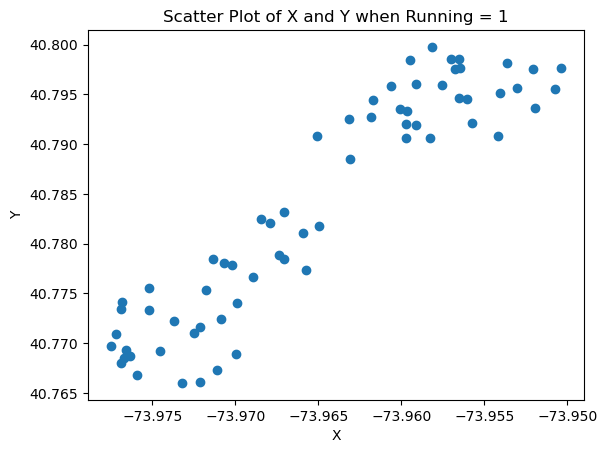

In [36]:
running_df = cleaned[cleaned['Running'] == 1]

# Create a scatter plot
plt.scatter(running_df['X'], running_df['Y'])

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y when Running = 1')

# Display the plot
plt.show()

In [37]:
print("Hello World")

Hello World
